# Neural Networks I

Vamos a construir una red neuronal para clasificar ejemplos de un dataset sintético. El dataset consiste en 2 clases de puntos en el plano, separados por una curva no lineal. La idea es que la red neuronal aprenda a clasificar los puntos en base a su posición en el plano.

Comenzamos creando el dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

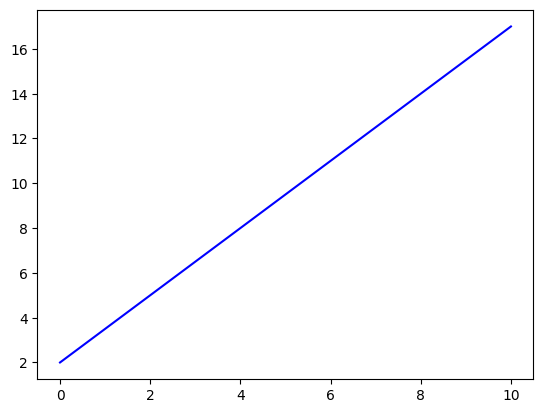

In [2]:
def division(x):
    return 1.5*x + 2

# Generar línea
line_x = np.linspace(0, 10, 100)
line_y = division(line_x)

# Visualizar línea
plt.plot(line_x, line_y, 'b-')

[[ 9.62851732  4.80712291]
 [ 2.37524065  6.96708152]
 [ 7.16003577  3.4896843 ]
 [ 9.83688069  4.48922984]
 [ 5.34554569 12.46825338]]
[0 1 0 0 1]


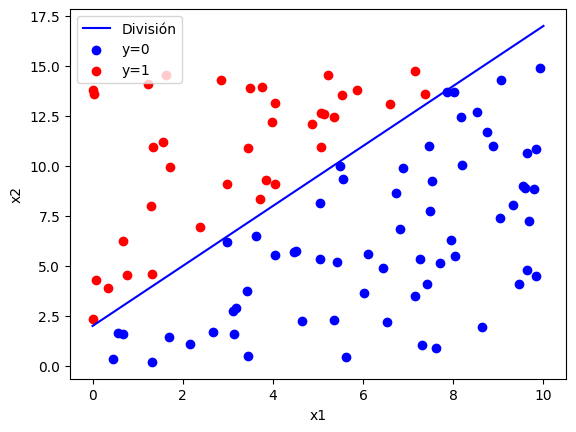

In [3]:

# Generar 100 datos aleatorios
data_x1 = 10 * np.random.random(100)
data_x2 = 15 * np.random.random(100)
X = np.array([data_x1, data_x2]).T

# Print 5 first rows
print(X[:5])

# Build labels, if x1 > x2 then y = 1, else y = 0
Y = np.where(data_x2 > division(data_x1), 1, 0)
# Convert y to numpy 
Y = np.array(Y)

# Print 5 first rows
print(Y[:5])


# Visualizar datos
plt.plot(line_x, line_y, 'b-')

# Plot the data, blue for y=0, red for y=1
plt.scatter(data_x1[Y==0], data_x2[Y==0], c='blue')
plt.scatter(data_x1[Y==1], data_x2[Y==1], c='red')

# Add legend
plt.legend(['División', 'y=0', 'y=1'])
# Add axis labels
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()


## Red Neuronal

Nuestro dataset consiste en 2 clases de puntos en el plano, separados por recta. La idea es que la red neuronal aprenda a clasificar los puntos en base a su posición en el plano.

Vamos a utilizar una red neuronal como la de la teoría, con dos capas ocultas de 3 neuronas cada una. La función de activación de las neuronas de todas las capas será la función sigmoide.

In [4]:
input_size = 2
hidden_size = 3
output_size = 1

Inicializamos weights y bias de cada capa con valores aleatorios.

In [5]:
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(1, hidden_size)

W2 = np.random.randn(hidden_size, hidden_size)
b2 = np.random.randn(1, hidden_size)

W3 = np.random.randn(hidden_size, output_size)
b3 = np.random.randn(1, output_size)

In [7]:
print(W1)
print(b1)

[[ 0.43099785 -1.10335359 -0.62627988]
 [ 1.07836792  1.82562848  0.75462461]]
[[-1.71429927 -0.48830561  1.43171609]]


Definimos los hiperparámetros de la red neuronal:
- learning rate
- epochs

In [15]:
learning_rate = 0.1
epochs = 100

Preparamos la función sigmoide y su derivada:

$$g(z) = \frac{1}{1+e^{-z}}$$

$$g'(z) = g(z)(1-g(z)) = \frac{e^{-z}}{(1+e^{-z})^2}$$

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

## Entrenamiento

### Forward pass

In [12]:
for epoch in range(epochs):
    # For each row in X
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]

        print(f"\nX: {x}, Y: {y}")

        # Forward pass
        z1 = np.dot(x, W1) + b1
        a1 = sigmoid(z1)

        print(f"\nZ1: {z1}, A1: {a1}")

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        print(f"\nZ2: {z2}, A2: {a2}")

        z3 = np.dot(a2, W3) + b3
        a3 = sigmoid(z3)
        output = 1 if a3[0][0] > 0.5 else 0

        print(f"\nZ3: {z3}, a3: {a3}, Output: {output}")
        
        break

    break


X: [9.62851732 4.80712291], Y: 0

Z1: [[ 7.61941811 -2.33594423 -0.9708573 ]], A1: [[0.99950941 0.0881895  0.27470966]]

Z2: [[ 1.88964343  0.59934823 -2.57125082]], A2: [[0.86871487 0.64550718 0.07101174]]

Z3: [[1.55061848]], a3: [[0.82500304]], Output: 1


### Backward pass

In [9]:
for epoch in range(epochs):
    # For each row in X
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]

        # Forward pass
        z1 = np.dot(x, W1) + b1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = sigmoid(z3)
        output = 1 if a3[0][0] > 0.5 else 0
        
        # Backpropagation
        # Compute loss
        loss = np.square(a3[0][0] - y)
        print(f"Loss: {loss}")

        error = a3[0][0] - y
        
        # Compute partial derivatives
        da3 = 2 * (a3[0][0] - y)
        dz3 = da3 * sigmoid_derivative(a3)
        dW3 = np.dot(a2.T, dz3)
        db3 = np.sum(dz3, axis=0, keepdims=True)

        print()
        print(f"da3: {da3}")
        print(f"dz3: {dz3}")
        print(f"dW3: {dW3}")
        print(f"db3: {db3}")

        da2 = np.dot(dz3, W3.T)
        dz2 = da2 * sigmoid_derivative(a2)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        print()
        print(f"da2: {da2}")
        print(f"dz2: {dz2}")
        print(f"dW2: {dW2}")
        print(f"db2: {db2}")

        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * sigmoid_derivative(a1)
        dW1 = x.reshape(-1, 1) * dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        print()
        print(f"da1: {da1}")
        print(f"dz1: {dz1}")
        print(f"dW1: {dW1}")
        print(f"db1: {db1}")
        

        # Update weights
        print()
        print(f"W3: {W3}, \ndW3: {dW3.reshape(-1, 1)}")
        print(f"b3: {b3}, \ndW3: {db3}")
        W3 -= learning_rate * dW3.reshape(-1, 1)
        b3 -= learning_rate * db3

        print()
        print(f"W2: {W2}, \ndW2: {dW2}")
        print(f"b2: {b2}, \ndb2: {db2}")
        W2 = W2 - learning_rate * dW2
        b2 -= learning_rate * db2

        print()
        print(f"W1: {W1}, \ndW1: {dW1}")
        print(f"b1: {b1}, \ndb1: {db1}")
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

        break
        
    break

Loss: 0.4339915679956582

da3: 1.3175607280055948
dz3: [[0.29617289]]
dW3: [[0.21501001]
 [0.1638206 ]
 [0.14074315]]
db3: [[0.29617289]]

da2: [[ 0.0026636   0.09069611 -0.24780797]]
dz2: [[ 0.0005299   0.02241806 -0.06179966]]
dW2: [[ 1.79868890e-07  7.60955589e-06 -2.09771910e-05]
 [ 1.91187896e-10  8.08841917e-09 -2.22972689e-08]
 [ 1.01209781e-04  4.28179374e-03 -1.18035805e-02]]
db2: [[ 0.0005299   0.02241806 -0.06179966]]

da1: [[-0.01002292  0.02138133 -0.05347438]]
dz1: [[-3.40101250e-06  7.71436363e-09 -8.26272491e-03]]
dW1: [[-1.78577547e-05  4.05059416e-08 -4.33852316e-02]
 [-5.88236559e-06  1.33427052e-08 -1.42911467e-02]]
db1: [[-3.40101250e-06  7.71436363e-09 -8.26272491e-03]]

W3: [[ 0.0089934 ]
 [ 0.30622692]
 [-0.83670039]], 
dW3: [[0.21501001]
 [0.1638206 ]
 [0.14074315]]
b3: [[0.87955832]], 
dW3: [[0.29617289]]

W2: [[ 2.17679777  0.69861243  0.43427339]
 [-0.02763534  0.8771151  -0.0280382 ]
 [-0.08286035 -1.07702722  0.47387978]], 
dW2: [[ 1.79868890e-07  7.609555

Antes de entrenar la red neuronal, vamos a calcular la que sería la salida para los 20 primeros ejemplos usando los pesos y bias aleatorios, veremos como no coincide con las etiquetas.

In [14]:
for i in range(20):
    x = X[i]
    y = Y[i]


    # Forward pass
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    output = 1 if a3[0][0] > 0.5 else 0

    
    print(f"X: {x}, \tY: {y}, \ta: {a3[0][0]}, \tPred: {output}")
        

X: [9.62851732 4.80712291], 	Y: 0, 	a: 0.8250030412837656, 	Pred: 1
X: [2.37524065 6.96708152], 	Y: 1, 	a: 0.8413703306410512, 	Pred: 1
X: [7.16003577 3.4896843 ], 	Y: 0, 	a: 0.8292252620906699, 	Pred: 1
X: [9.83688069 4.48922984], 	Y: 0, 	a: 0.821159996037087, 	Pred: 1
X: [ 5.34554569 12.46825338], 	Y: 1, 	a: 0.8414120092228554, 	Pred: 1
X: [3.11114466 2.72606456], 	Y: 0, 	a: 0.8384559045434368, 	Pred: 1
X: [ 5.533635   13.52400288], 	Y: 1, 	a: 0.8414129602395765, 	Pred: 1
X: [5.41158151 5.18953351], 	Y: 0, 	a: 0.8409185483231408, 	Pred: 1
X: [6.73669937 8.62789542], 	Y: 0, 	a: 0.841331255307414, 	Pred: 1
X: [ 3.43995132 10.88559297], 	Y: 1, 	a: 0.8414117970735431, 	Pred: 1
X: [ 3.48741153 13.88488352], 	Y: 1, 	a: 0.8414137181856444, 	Pred: 1
X: [ 8.88614214 10.99728138], 	Y: 0, 	a: 0.8413609357102572, 	Pred: 1
X: [ 1.56396933 11.20278047], 	Y: 1, 	a: 0.8414131031841523, 	Pred: 1
X: [ 8.18390819 10.03796377], 	Y: 0, 	a: 0.8413435661687696, 	Pred: 1
X: [ 0.02481881 13.57637643], 	Y: 1,

In [16]:
epoch_loss = [0 for i in range(epochs)]

for epoch in range(epochs):
    # For each row in X
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]

        # Forward pass
        z1 = np.dot(x, W1) + b1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = sigmoid(z3)
        output = 1 if a3[0][0] > 0.5 else 0
        
        # Backpropagation
        # Compute loss
        loss = np.square(a3[0][0] - y)
        epoch_loss[epoch] += loss

        # Compute partial derivatives
        da3 = 2 * (a3[0][0] - y)
        dz3 = da3 * sigmoid_derivative(z3)
        dW3 = np.dot(a2.T, dz3)
        db3 = np.sum(dz3, axis=0, keepdims=True)

        da2 = np.dot(dz3, W3.T)
        dz2 = da2 * sigmoid_derivative(z2)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * sigmoid_derivative(z1)
        dW1 = x.reshape(-1, 1) * dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)
        
        # Update weights
        W3 -= learning_rate * dW3.reshape(-1, 1)
        b3 -= learning_rate * db3

        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    
    epoch_loss[epoch] /= X.shape[0]


In [17]:
print(epoch_loss)

[0.2880775486614247, 0.2116603814794552, 0.19885818309055867, 0.18112129948313416, 0.15287531106220642, 0.12169359787704824, 0.09880205025236574, 0.08063322879533144, 0.06656610990085482, 0.055606848841134315, 0.04907068831279253, 0.04454428441704127, 0.04090262162011018, 0.03786159253843268, 0.035268719423160386, 0.03303194014794495, 0.03109270446689513, 0.029410213637558927, 0.02795358310964315, 0.02669810971339853, 0.025623395909127725, 0.024713788513683152, 0.023961836814255465, 0.023373076873710173, 0.022967032244885346, 0.0227670445906466, 0.022758072813724186, 0.022820766388013333, 0.023330465057278062, 0.02485695027263619, 0.02773253911685013, 0.030313563337821852, 0.03193916517982095, 0.03192623439729801, 0.03204664751398314, 0.03203798663445816, 0.0318993003826382, 0.03167254876026395, 0.03138343980857114, 0.03104664367371029, 0.030671847989256748, 0.030265551393513248, 0.02983311362463706, 0.029380490761898942, 0.028914614238357575, 0.028442628501054917, 0.02797113021637034,

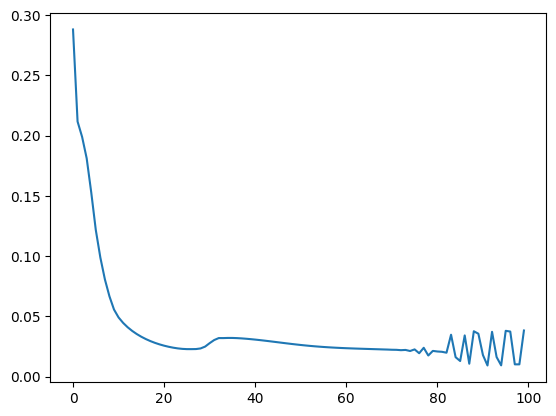

In [18]:
# Display loss per epoch
plt.plot(epoch_loss)

## Test

Probamos la red neuronal con algunos ejemplos del dataset de entrenamiento y con otros nuevos.

In [20]:
for i in range(20):
    x = X[i]
    y = Y[i]


    # Forward pass
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    output = 1 if a3[0][0] > 0.5 else 0

    
    print(f"X: {x}, \tY: {y}, \ta: a3[0][0], \tPred: {output}")
        

X: [9.62851732 4.80712291], 	Y: 0, 	Pred: 0
X: [2.37524065 6.96708152], 	Y: 1, 	Pred: 1
X: [7.16003577 3.4896843 ], 	Y: 0, 	Pred: 0
X: [9.83688069 4.48922984], 	Y: 0, 	Pred: 0
X: [ 5.34554569 12.46825338], 	Y: 1, 	Pred: 1
X: [3.11114466 2.72606456], 	Y: 0, 	Pred: 0
X: [ 5.533635   13.52400288], 	Y: 1, 	Pred: 1
X: [5.41158151 5.18953351], 	Y: 0, 	Pred: 0
X: [6.73669937 8.62789542], 	Y: 0, 	Pred: 0
X: [ 3.43995132 10.88559297], 	Y: 1, 	Pred: 1
X: [ 3.48741153 13.88488352], 	Y: 1, 	Pred: 1
X: [ 8.88614214 10.99728138], 	Y: 0, 	Pred: 0
X: [ 1.56396933 11.20278047], 	Y: 1, 	Pred: 1
X: [ 8.18390819 10.03796377], 	Y: 0, 	Pred: 0
X: [ 0.02481881 13.57637643], 	Y: 1, 	Pred: 1
X: [5.04149369 8.13611786], 	Y: 0, 	Pred: 0
X: [ 4.86694765 12.07348025], 	Y: 1, 	Pred: 1
X: [ 1.22814844 14.09803292], 	Y: 1, 	Pred: 1
X: [ 3.98374223 12.19326957], 	Y: 1, 	Pred: 1
X: [ 1.34702088 10.93235288], 	Y: 1, 	Pred: 1
